# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
          # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | usogorsk
Processing Record 3 of Set 1 | juli
Processing Record 4 of Set 1 | san patricio
Processing Record 5 of Set 1 | thunder bay
Processing Record 6 of Set 1 | ostersund
Processing Record 7 of Set 1 | lazaro cardenas
Processing Record 8 of Set 1 | makeni
Processing Record 9 of Set 1 | ebon
Processing Record 10 of Set 1 | bilibino
Processing Record 11 of Set 1 | new plymouth
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | usinsk
Processing Record 16 of Set 1 | luderitz
Processing Record 17 of Set 1 | invercargill
Processing Record 18 of Set 1 | okha
Processing Record 19 of Set 1 | phrae
Processing Record 20 of Set 1 | hamilton
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | gizo
Processing Record 23 of Set 1 | geraldton
Pro

Processing Record 43 of Set 4 | vanimo
Processing Record 44 of Set 4 | luanda
Processing Record 45 of Set 4 | lata
Processing Record 46 of Set 4 | chonchi
Processing Record 47 of Set 4 | egilsstadir
Processing Record 48 of Set 4 | raja
Processing Record 49 of Set 4 | ust-nera
Processing Record 0 of Set 5 | bukama
Processing Record 1 of Set 5 | pitkyaranta
Processing Record 2 of Set 5 | anzio
Processing Record 3 of Set 5 | sydney
Processing Record 4 of Set 5 | makokou
Processing Record 5 of Set 5 | la rinconada
Processing Record 6 of Set 5 | nova sintra
Processing Record 7 of Set 5 | panacan
Processing Record 8 of Set 5 | novhorod-sivers'kyy
Processing Record 9 of Set 5 | kittila
Processing Record 10 of Set 5 | leava
Processing Record 11 of Set 5 | yangambi
Processing Record 12 of Set 5 | asentamiento humano nicolas de pierola
Processing Record 13 of Set 5 | jawf al maqbabah
Processing Record 14 of Set 5 | maubara
City not found. Skipping...
Processing Record 15 of Set 5 | lodwar
Proces

Processing Record 34 of Set 8 | teguise
Processing Record 35 of Set 8 | mohr
Processing Record 36 of Set 8 | touros
Processing Record 37 of Set 8 | turochak
Processing Record 38 of Set 8 | bajina basta
Processing Record 39 of Set 8 | francistown
Processing Record 40 of Set 8 | sommatino
Processing Record 41 of Set 8 | bergama
Processing Record 42 of Set 8 | constitucion
Processing Record 43 of Set 8 | ponta delgada
Processing Record 44 of Set 8 | ksar el kebir
Processing Record 45 of Set 8 | urangan
Processing Record 46 of Set 8 | ketchikan
Processing Record 47 of Set 8 | balykshi
Processing Record 48 of Set 8 | gua musang
Processing Record 49 of Set 8 | strezhevoy
Processing Record 0 of Set 9 | padang
Processing Record 1 of Set 9 | shahada
Processing Record 2 of Set 9 | hopelchen
Processing Record 3 of Set 9 | ugoofaaru
Processing Record 4 of Set 9 | tarawa
Processing Record 5 of Set 9 | takestan
Processing Record 6 of Set 9 | sora
Processing Record 7 of Set 9 | prince rupert
Processi

Processing Record 22 of Set 12 | hasaki
Processing Record 23 of Set 12 | hengchun
Processing Record 24 of Set 12 | tamiahua
Processing Record 25 of Set 12 | katsuura
Processing Record 26 of Set 12 | tyukalinsk
Processing Record 27 of Set 12 | jutai
Processing Record 28 of Set 12 | taseyevo
Processing Record 29 of Set 12 | mhangura
Processing Record 30 of Set 12 | palikir - national government center
Processing Record 31 of Set 12 | chayan
Processing Record 32 of Set 12 | sungai penuh
Processing Record 33 of Set 12 | itoman
Processing Record 34 of Set 12 | jamaame
Processing Record 35 of Set 12 | saratamata
City not found. Skipping...
Processing Record 36 of Set 12 | port douglas
Processing Record 37 of Set 12 | zambezi
Processing Record 38 of Set 12 | yanam
Processing Record 39 of Set 12 | togur
Processing Record 40 of Set 12 | lagoa
Processing Record 41 of Set 12 | vilyuysk
Processing Record 42 of Set 12 | kenai
Processing Record 43 of Set 12 | spanish wells
Processing Record 44 of Se

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,72.90,79,100,11.39,PN,1698505218
1,usogorsk,63.4106,48.6872,25.66,83,100,9.95,RU,1698505257
2,juli,-16.2167,-69.4500,55.69,28,76,5.17,PE,1698505258
3,san patricio,28.0170,-97.5169,84.85,75,2,11.48,US,1698505258
4,thunder bay,48.4001,-89.3168,31.98,80,75,2.30,CA,1698505258


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,72.90,79,100,11.39,PN,1698505218
1,usogorsk,63.4106,48.6872,25.66,83,100,9.95,RU,1698505257
2,juli,-16.2167,-69.4500,55.69,28,76,5.17,PE,1698505258
3,san patricio,28.0170,-97.5169,84.85,75,2,11.48,US,1698505258
4,thunder bay,48.4001,-89.3168,31.98,80,75,2.30,CA,1698505258


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

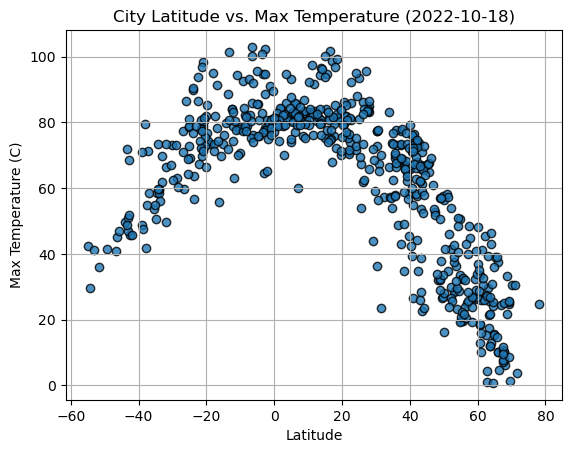

In [9]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.scatter(x_axis,y_axis,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

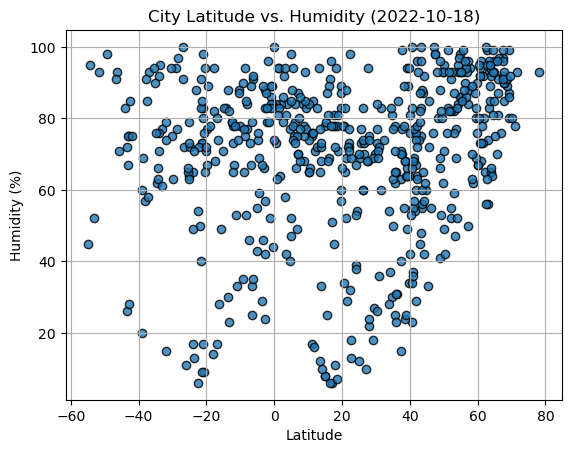

In [10]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
plt.scatter(x_axis,y_axis,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

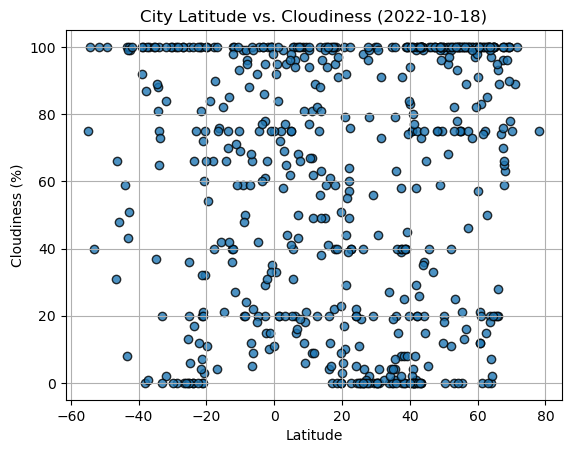

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']
plt.scatter(x_axis,y_axis,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

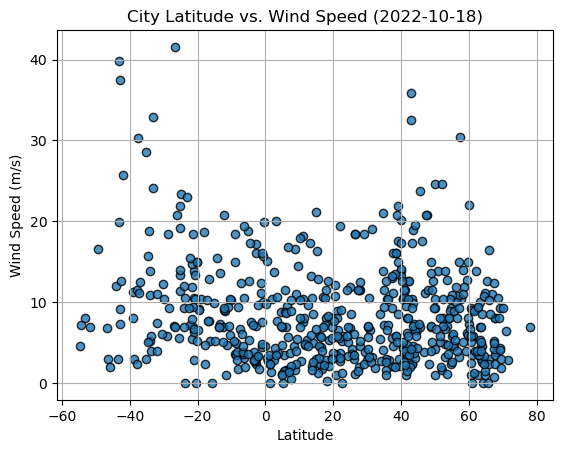

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']
plt.scatter(x_axis,y_axis,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    print(f"The r-value is: {rvalue}")
    plt.show()

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,usogorsk,63.4106,48.6872,25.66,83,100,9.95,RU,1698505257
3,san patricio,28.0170,-97.5169,84.85,75,2,11.48,US,1698505258
4,thunder bay,48.4001,-89.3168,31.98,80,75,2.30,CA,1698505258
5,ostersund,63.1792,14.6357,29.61,74,100,6.91,SE,1698505259
6,lazaro cardenas,17.9583,-102.2000,80.65,78,95,2.84,MX,1698505259


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,72.90,79,100,11.39,PN,1698505218
2,juli,-16.2167,-69.4500,55.69,28,76,5.17,PE,1698505258
10,new plymouth,-39.0667,174.0833,48.81,60,92,11.27,NZ,1698505260
11,grytviken,-54.2811,-36.5092,29.48,95,100,7.14,GS,1698505261
15,luderitz,-26.6481,15.1594,59.70,72,0,41.56,NaN,1698505261


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8640469959290302


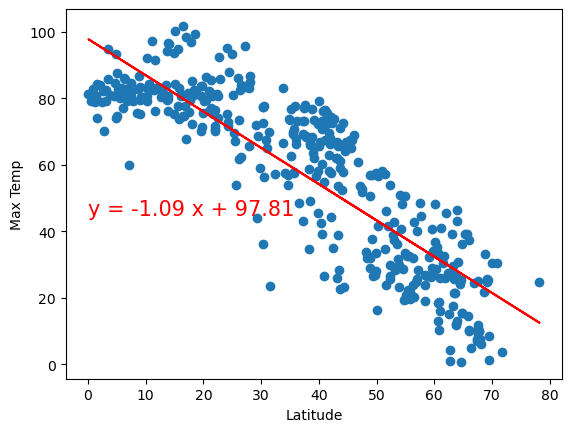

In [24]:
# Linear regression on Northern Hemisphere
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plot_linear_regression(x_values, y_values, 'Max Temp', (0,45))


The r-value is: 0.7484103932033825


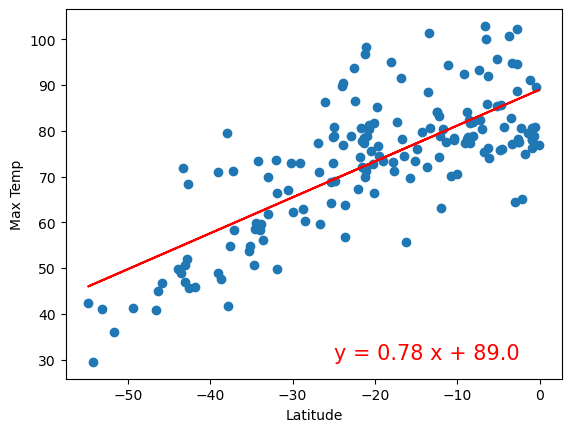

In [25]:
# Linear regression on Southern Hemisphere
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plot_linear_regression(x_values, y_values, 'Max Temp', (-25,30))


**Discussion about the linear relationship:** In the Northen Hemisphere, there is signifcant negative correlation between temperature and latitude. As you move northward, the temperature tends to decrease significantly. In the Southern Hemisphere, the temperature tends to increase significantly as you move northward. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2741462315023999


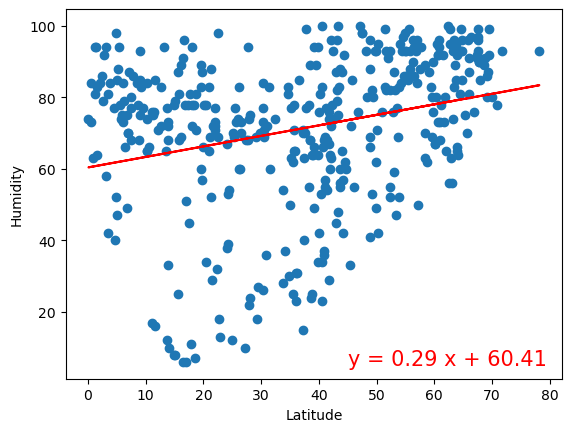

In [26]:
# Northern Hemisphere
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plot_linear_regression(x_values, y_values, 'Humidity', (45,5))


The r-value is: -0.03207763690360261


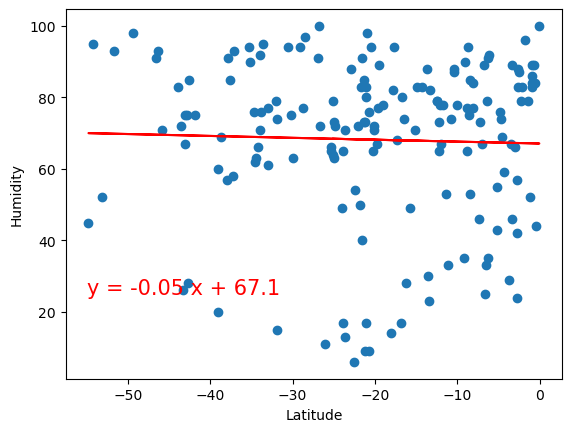

In [27]:
# Southern Hemisphere
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plot_linear_regression(x_values, y_values, 'Humidity', (-55,25))


**Discussion about the linear relationship:** In the Northern Hemisphere, there is a positive correlation between humidity and latitude. As you move northward, the humidity tends to increase. While in the Southern Hemisphere, the temperature tends to slightly decrease as you move north.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.17455271598782238


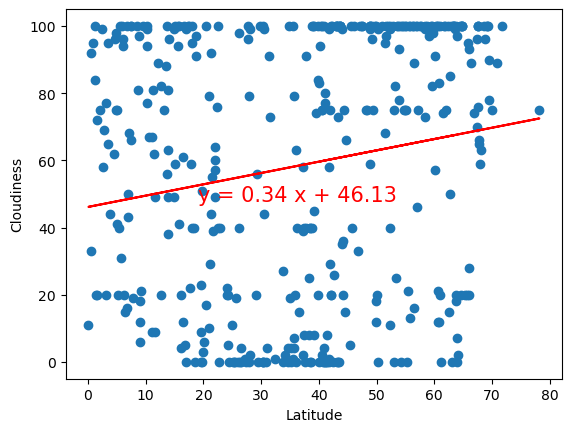

In [28]:
# Northern Hemisphere
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plot_linear_regression(x_values, y_values, 'Cloudiness', (19,48))


The r-value is: -0.05397910449640478


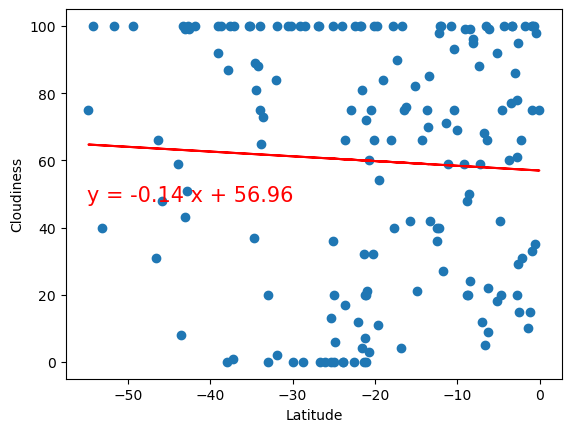

In [29]:
# Southern Hemisphere
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plot_linear_regression(x_values, y_values, 'Cloudiness', (-55,48))


**Discussion about the linear relationship:** In the Northern Hemisphere, there is a positive correlation between cloudiness and latitude. Indicating as you move northward, cloudiness tends to increase. Inversely, cloudiness tends to slightly decrease as you move northward in the Southern Hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.04929549938791061


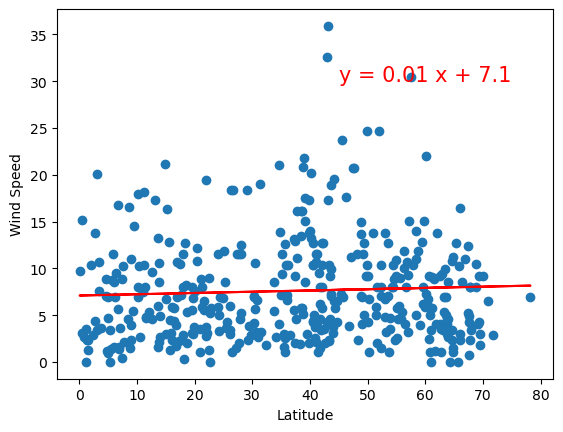

In [30]:
# Northern Hemisphere
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plot_linear_regression(x_values, y_values, 'Wind Speed', (45,30))


The r-value is: -0.23350674959339496


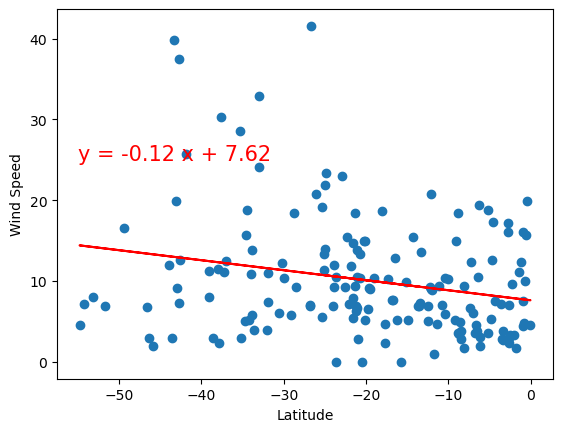

In [31]:
# Southern Hemisphere
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plot_linear_regression(x_values, y_values, 'Wind Speed', (-55,25))


**Discussion about the linear relationship:** In the Northern Hemisphere, there is a very weak positive relationship, indicated by the slope of 0.01. There is a very small tendency for wind speed to increase slightly as you move northwards. In the Southern Hemisphere, there is a weak negative relationship indicating the wind speed tends to decrease as you move northwards.